# PROJET SPEED DATING - LISE GNOS

In this project I chose to focus on the way people's perception is affected by their speed dating experience.

In [265]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable


In [266]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 220)

In [267]:
df = pd.read_csv('Speed Dating Data.csv', encoding='iso-8859-1')

# 1) Some statistics to describe the dataset

In [268]:
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [269]:
df.shape

(8378, 195)

In [270]:
df.describe(include='all')

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,4914,3133,3583,8315.000000,8299.000000,8299.000000,8299,7314,4279,8299.000000,8281.000000,8299.000000,8289,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,68,115,NaN,NaN,NaN,269,409,261,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [271]:
# Number of missing values for each feature
df.isnull().sum().to_frame().T

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,0,1,0,0,0,0,0,0,1846,0,0,10,0,158,0,104,73,89,89,89,98,107,129,0,212,287,306,360,722,1076,250,318,385,95,63,82,3464,5245,4795,63,79,79,79,1064,4099,79,97,79,89,138,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,101,6578,79,79,79,89,99,121,1889,1889,1889,1889,1889,1911,79,79,79,79,89,89,105,105,105,105,105,3472,3472,3472,3472,3472,0,202,277,296,350,712,1067,240,309,375,1173,4282,4282,4282,4282,4282,4282,4378,4378,4378,4378,4378,915,915,945,6394,6423,6394,6394,6423,6404,933,915,915,915,915,915,2603,2603,2603,2603,2603,2603,2603,2603,2603,2603,2603,2603,915,915,915,915,915,4001,4001,4001,4001,4001,4404,4404,4404,6882,7710,4404,4404,4404,4404,4404,4404,6362,6362,6362,6362,6362,6362,5419,5419,5419,5419,5419,5419,5419,5419,5419,5419,5419,6362,4404,4404,4404,4404,4404,6362,6362,6362,6362,6362


There are a lot of missing values for the answers of some questionnaries (towards the last columns).

In [272]:
df['gender'].unique()

array([0, 1])

In [273]:
df_gender = df.groupby(by=['iid']).mean(numeric_only = True) # group by 'iid' to count only once the gender for each person

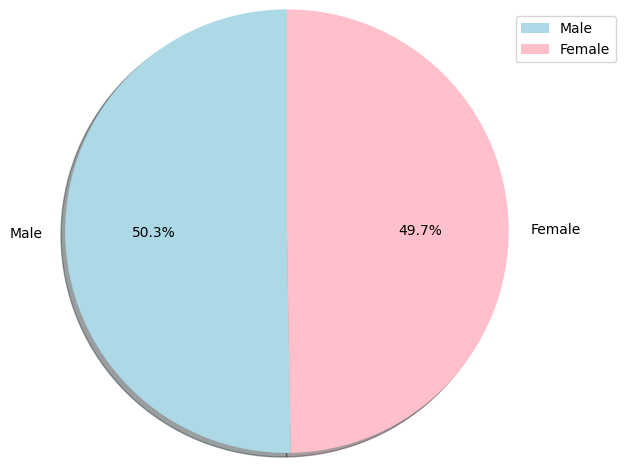

In [274]:
# Distribution between male and female

genders = df_gender['gender'].apply(lambda x: 
                               "Female" if x==0 
                               else "Male" if x == 1
                               else "Missing")
df_pie = genders.value_counts()

plt.figure()
plt.pie(df_pie.values, labels=df_pie.index,
       autopct='%1.1f%%',
        colors = ['lightblue', 'pink'],
       shadow=True, 
       startangle=90,
       radius=1.5
       )
plt.legend(bbox_to_anchor=(1.1, 1.1))
plt.show()

The repartition between male and female is equal.

In [275]:
# Distribution of ages

df_temp = df.groupby(by = ['iid']).mean(numeric_only = True)

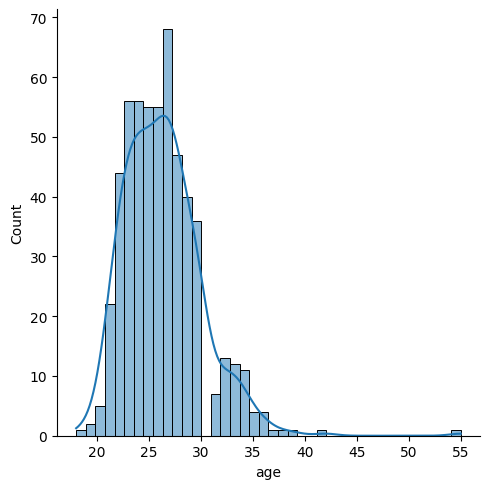

In [276]:
sns.displot(data=df_temp, x='age', kde=True, bins=40)

<AxesSubplot: xlabel='age'>

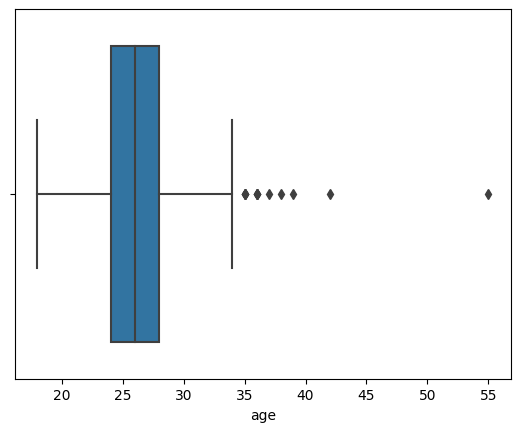

In [277]:
sns.boxplot(data=df_temp, x='age')

Ages are note very well distributed, the gaussian curve is skewed. I choose to keep only ages between 18 and 34 in order to have a good representativeness.

In [278]:
# Keeping ages between 18 and 34 (both participants and partners)

mask = (df['age'] > 17) & (df['age'] < 35) & (df['age_o'] > 17) & (df['age_o'] < 35)
df1 = df.loc[mask,:]
df1.shape

(7844, 195)

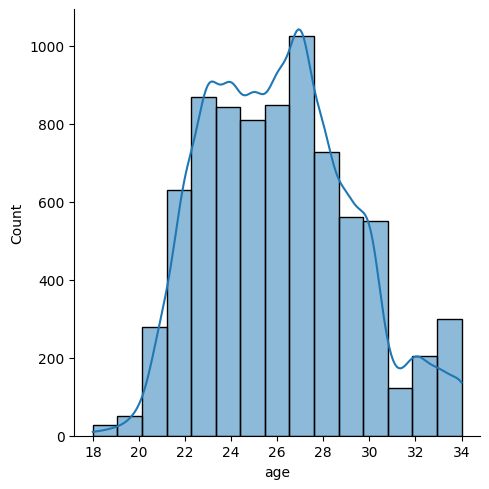

In [279]:
# Check new age distribution

df_temp = df1.groupby(by = ['iid']).mean(numeric_only = True)
sns.displot(data=df1, x='age', kde=True, bins=15)

I choose to focus on 2 topics :
First, how does speed dating affect the way people perceive themselves ?
Secondly, which parameters influence matches and dates ?

# Topic 1 : the amount of choices (to delete)
The dataset contains the column 'condtn' (1 = limited choice and 2 = extensive choice). Basically, the choice is limited when people meet about 10 potential partners during one wave. The choice is extensive when they meet about 20 people (twice as much).

In [280]:
# Calculate percentage of matches towards number of partners met

df_temp = df1.groupby(by = ['iid']).agg({'match':['sum'], 'round':'first'})
df_temp.columns = df_temp.columns.droplevel(-1) # remove double header for sum and first
df_temp.head()

,match,round
iid,,
1,4,10
2,2,10
3,0,10
4,2,10
5,2,10


In [281]:
df_temp['percentage'] = df_temp['match'] / df_temp['round']
df_temp.head()

,match,round,percentage
iid,,,
1,4,10,0.4
2,2,10,0.2
3,0,10,0.0
4,2,10,0.2
5,2,10,0.2


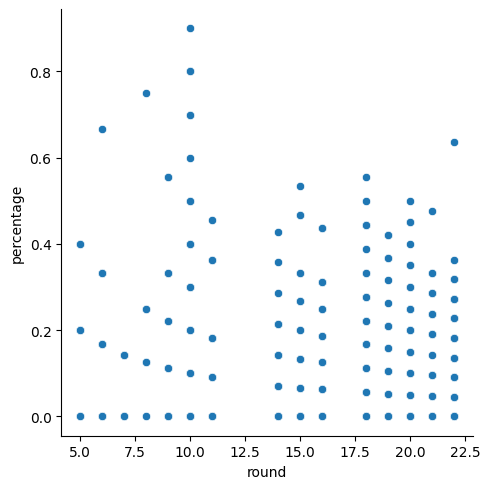

In [282]:
sns.relplot(data=df_temp, x='round', y='percentage')

# Topic 1 : how does speed dating affect the way people perceive themselves ?

Let's study the evolution of people's own perception troughout the speed dating process.
To do that, people have answered the following questions : "How do you think you measure up ?" and "Your opinion of your own attributes ?" at different times : 1-before the event, 2-halfway through the event, 3-the day after the event, 4-3/4 weeks later. Phase 4 is missing lots of values, so we will focus only on the first 3 phases.
For all the 3 phases, people have scored their own attributes on a scale of 1 to 10 (1=awful, 10=great), so everything is comparable.

In [283]:
df_temp = df1.groupby(by = ['iid'], as_index=False).mean(numeric_only = True) # group by one row per person
df_temp.sample(10)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
121,127,6.0,1.0,12.0,1.0,5.0,10.0,5.666667,NaN,5.333333,6.000000,116.333333,0.444444,-0.215556,0.555556,20.444444,2.555556,22.222222,13.888889,21.111111,23.333333,13.666667,5.777778,0.555556,7.333333,5.888889,6.111111,6.111111,6.111111,5.111111,5.666667,5.333333,1.777778,22.0,5.0,2.0,1.0,1.0,6.0,5.0,1.0,6.0,10.0,8.0,8.0,8.0,5.0,3.0,5.0,5.0,6.0,1.0,7.0,1.0,5.0,8.0,7.0,5.0,10.0,1.0,20.0,25.00,25.00,25.00,15.00,5.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,20.00,20.00,20.00,20.00,10.00,10.00,8.0,8.0,9.0,9.0,8.0,NaN,NaN,NaN,NaN,NaN,0.666667,7.000000,6.333333,7.222222,6.222222,6.333333,5.000000,6.444444,8.750000,1.777778,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,40.00,10.00,10.00,20.00,0.00,20.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,5.0,10.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,40.00,20.00,20.00,10.00,5.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,8.0,8.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN
372,392,14.0,0.0,27.0,2.0,15.0,19.0,15.000000,15.0,10.000000,10.000000,406.000000,0.105263,0.275789,0.789474,27.105263,2.210526,33.157895,13.736842,19.052632,17.947368,7.157895,8.947368,0.473684,6.000000,7.631579,7.222222,7.105263,7.000000,6.466667,6.526316,6.157895,2.000000,26.0,6.0,2.0,6.0,1.0,5.0,4.0,3.0,6.0,4.0,3.0,3.0,9.0,10.0,9.0,9.0,1.0,3.0,10.0,6.0,8.0,10.0,5.0,10.0,7.0,7.0,3.0,NaN,15.00,20.00,15.00,30.00,10.00,10.00,15.0,20.0,15.0,25.0,15.0,10.0,25.00,10.00,10.00,25.00,15.00,15.00,4.0,7.0,7.0,8.0,7.0,5.0,6.0,7.0,8.0,5.0,0.315789,4.894737,6.473684,7.315789,5.631579,8.000000,4.000000,5.157895,3.736842,2.000000,2.0,15.00,20.00,15.00,20.00,10.00,20.00,8.0,8.0,8.0,7.0,7.0,7.0,3.0,3.0,25.0,20.0,10.0,25.0,10.0,10.0,15.00,20.00,15.00,20.00,10.00,20.00,20.0,15.0,20.0,20.0,10.0,15.0,25.00,10.00,10.00,25.00,10.00,20.00,7.0,9.0,9.0,8.0,7.0,6.0,7.0,8.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,195,2.0,0.0,3.0,2.0,9.0,20.0,6.000000,6.0,10.526316,10.157895,223.157895,0.263158,0.114737,0.631579,26.842105,2.736842,16.817368,17.234211,19.290000,17.555263,12.990526,16.115789,0.789474,6.578947,7.000000,7.526316,7.210526,5.894737,5.888889,6.631579,5.578947,1.894737,27.0,10.0,2.0,3.0,9.0,1.0,2.0,1.0,2.0,7.0,6.0,9.0,8.0,5.0,5.0,9.0,9.0,8.0,10.0,1.0,3.0,4.0,3.0,6.0,5.0,1.0,8.0,NaN,15.38,19.23,19.23,19.23,13.46,13.46,7.0,9.0,7.0,9.0,10.0,8.0,22.73,15.91,18.18,18.18,11.36,13.64,9.0,8.0,10.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN,0.315789,6.947368,8.052632,8.947368,7.000000,7.789474,6.526316,7.421053

In [284]:
df_temp_median = df_temp.median() # taking the median for all the scores

In [285]:
categories = ['Attractive','Sincere','Intelligent', 'Fun', 'Ambitious']

# Plotting the way people perceive themselves throughout the 3 phases : features attr3_1, attr3_s, attr3_2 for 'attractive' and so on for all the attributes

fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r=[df_temp_median['attr3_1'], df_temp_median['sinc3_1'], df_temp_median['intel3_1'], df_temp_median['fun3_1'], df_temp_median['amb3_1']],
      theta=categories,
      fill='toself',
      name='Before the event'
))
fig.add_trace(go.Scatterpolar(
      r=[df_temp_median['attr3_s'], df_temp_median['sinc3_s'], df_temp_median['intel3_s'], df_temp_median['fun3_s'], df_temp_median['amb3_s']],
      theta=categories,
      fill='toself',
      name='Halfway through the event'
))
fig.add_trace(go.Scatterpolar(
      r=[df_temp_median['attr3_2'], df_temp_median['sinc3_2'], df_temp_median['intel3_2'], df_temp_median['fun3_2'], df_temp_median['amb3_2']],
      theta=categories,
      fill='toself',
      name='The day after the event'
))
fig.update_layout(
    title=go.layout.Title(text='People\'s own perception troughout the speed dating process'),
    polar=dict(radialaxis=dict(visible=True, range=[0, 10])),
    showlegend=True
)
fig.show()

# Plotting the way people think the others perceive them throughout the 2 phases : features attr5_1, attr5_2 for 'attractive' and so on for all the attributes

fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r=[df_temp_median['attr5_1'], df_temp_median['sinc5_1'], df_temp_median['intel5_1'], df_temp_median['fun5_1'], df_temp_median['amb5_1']],
      theta=categories,
      fill='toself',
      name='Before the event'
))
fig.add_trace(go.Scatterpolar(
      r=[df_temp_median['attr5_2'], df_temp_median['sinc5_2'], df_temp_median['intel5_2'], df_temp_median['fun5_2'], df_temp_median['amb5_2']],
      theta=categories,
      fill='toself',
      name='The day after the event'
))
fig.update_layout(
    title=go.layout.Title(text='The way people think the others perceive them troughout the speed dating process'),
    polar=dict(radialaxis=dict(visible=True, range=[0, 10])),
    showlegend=True
)
fig.show()


The previous results are interesting : people do not change the perception of themselves at all throughout the speed dating process. However, the way people think the others perceive them evolves for 2 attributes : after the speed dating, people think that they are seen by others less fun and ambitious.

Let's now plot the difference between how people perceive themselves and how they are really scored by their partners.

In [286]:
# Plotting the difference between how people perceive themselves and how they are really seen, depending on their age : features attr3_1 - attr_o for 'attractive' and so on for all the attributes

df_temp_gap = df_temp[['age', 'attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o']].copy()
df_temp_gap['Attractive'] = df_temp_gap['attr3_1'] - df_temp_gap['attr_o']
df_temp_gap['Sincere'] = df_temp_gap['sinc3_1'] - df_temp_gap['sinc_o']
df_temp_gap['Intelligent'] = df_temp_gap['intel3_1'] - df_temp_gap['intel_o']
df_temp_gap['Fun'] = df_temp_gap['fun3_1'] - df_temp_gap['fun_o']
df_temp_gap['Ambitious'] = df_temp_gap['amb3_1'] - df_temp_gap['amb_o']
df_temp_gap = df_temp_gap.groupby(by = ['age'], as_index=False).mean(numeric_only = True) # group by age because we are going to analyze the influence of age
df_temp_gap.head()


,age,attr3_1,sinc3_1,intel3_1,fun3_1,amb3_1,attr_o,sinc_o,intel_o,fun_o,amb_o,Attractive,Sincere,Intelligent,Fun,Ambitious
0,18.0,8.000000,7.000000,7.000000,7.000000,8.000000,6.375000,8.666667,7.222222,5.777778,6.888889,1.625000,-1.666667,-0.222222,1.222222,1.111111
1,19.0,6.000000,8.000000,8.000000,7.000000,8.000000,6.047619,7.595238,6.690476,5.222222,6.388889,-0.047619,0.404762,1.309524,1.777778,1.611111
2,20.0,6.800000,8.000000,7.400000,7.800000,7.800000,6.990476,7.314286,7.303175,6.568254,6.541880,-0.190476,0.685714,0.096825,1.231746,1.258120
3,21.0,6.954545,7.863636,8.545455,7.954545,8.500000,6.246642,7.167739,7.292234,6.617076,6.854376,0.707903,0.695897,1.253221,1.337470,1.645624
4,22.0,6.818182,8.363636,8.431818,8.022727,7.909091,6.097250,7.189397,7.355800,6.456509,6.801149,0.720932,1.174240,1.076019,1.566218,1.107942


In [287]:
# expanding columns into rows in order to prepare the dataset for a radar chart
df_temp_gap = pd.melt(df_temp_gap, id_vars=['age'], value_vars = ['Attractive','Sincere','Intelligent', 'Fun', 'Ambitious'], var_name = 'Topic', value_name = 'Gap of perception') 

In [288]:
df_temp_gap.head(20)

,age,Topic,Gap of perception
0,18.0,Attractive,1.625000
1,19.0,Attractive,-0.047619
2,20.0,Attractive,-0.190476
3,21.0,Attractive,0.707903
4,22.0,Attractive,0.720932
5,23.0,Attractive,0.623397
6,24.0,Attractive,1.064632
7,25.0,Attractive,0.830932
8,26.0,Attractive,0.758628
9,27.0,Attractive,0.819439


In [289]:
# plotting an animated radar plot

fig = px.line_polar(df_temp_gap,
        r='Gap of perception', 
        theta='Topic',
        color = 'age',
        line_close=True,
        color_discrete_sequence=px.colors.sequential.Turbo,
        template = 'ggplot2',
        animation_frame = 'age',
        title = 'Difference between own perception and real scoring, according to age'
        )
fig.update_traces(fill="toself")
fig.show()

The graph shows that younger people overestimate mostly their ambitious and fun parts. On the other hand, older people overestimate mostly their attractive, sincere and intelligent parts.
It is quite funny to see that at all ages people overestimate their fun part !

Let's try to verify if people who are used to date a lot perceive themselves in a more realistic way.

In [290]:
# calculate the difference of score between people and the score given by their partner

df1['score_diff'] = df1['attr3_1'] + df1['sinc3_1'] + df1['intel3_1'] + df1['fun3_1'] + df1['amb3_1'] - df1['attr_o'] - df1['sinc_o'] - df1['intel_o'] - df1['fun_o'] - df1['amb_o']

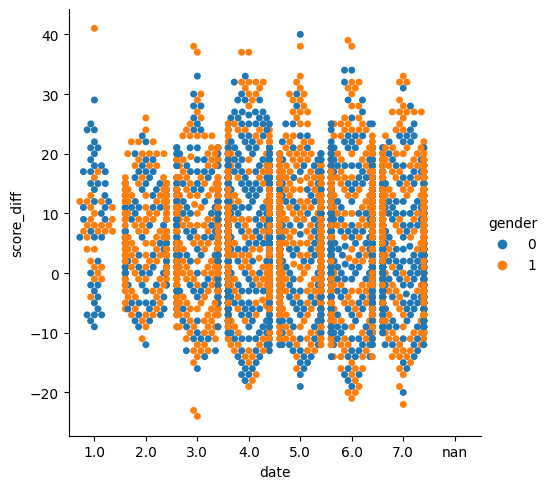

In [291]:
sns.catplot(data = df1, x='date', y='score_diff', kind="swarm", hue='gender')

Surprisingly, the more people date, the more the perception of themselves is different from the perception partners have of them (in a better or in a worse way). People who date the least are closer to their partners' perception.

# Topic 2 : Which parameters influence matches and dates ?

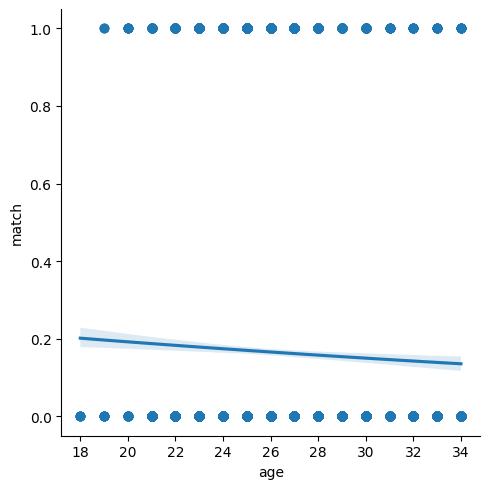

In [292]:
# Check the effect of age
sns.lmplot(x="age", y="match", data= df1, logistic = True)

We can see that the younger people are, the more matches they have.

In [293]:
# Building correlation matrix

dscore = df1[['match', 'dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met']]
dscore.head()

,match,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
0,0,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0
1,0,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0
2,1,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0
3,1,1,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,2.0
4,1,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,2.0


match    1.000000
dec      0.522876
like     0.306874
fun      0.276350
shar     0.267917
attr     0.261077
prob     0.253696
intel    0.169855
sinc     0.165961
amb      0.139315
met      0.031256
Name: match, dtype: float64

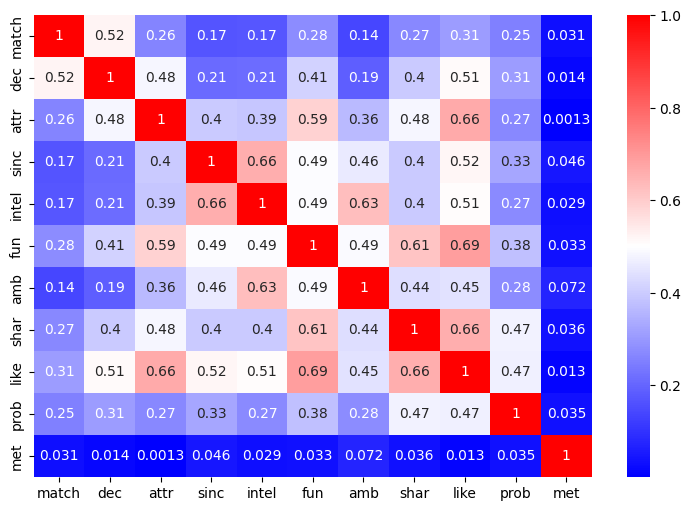

In [294]:
corr = dscore.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr, annot=True, ax=ax, cmap='bwr')
abs(corr['match']).sort_values(ascending = False)

The match is first correlated to the decision of the subjects ('dec'). It is quite obvious because the match happens when the 2 subjects both take a yes decision. In the same way, the 'like' parameter represents an overall feeling of the person, which is very important for the decision.
Apart from that, the most important skills for a match are : Fun, Shared Interests/Hobbies, Attractive, much before Sincere, Intelligent and Ambitious.
It is important to notice that the 'prob' parameter plays a great role for a match. It corresponds to : How probable do you think it is that this person will say 'yes' for you? It seems that people can guess if their partner was interested or not.

Let's have a look now on the influence of what people look for in the opposite sex for dating after the matches.

In [295]:
# 'date_3' feature : Have you been on a date with any of your matches?

df1['date_3'].isna().sum() # lots of missing values

4080

In [296]:
# removing missing values and waves 6-9 because we are going to use the notation on 100 points for the question : We want to know what you look for in the opposite sex (attributes attr1_1 etc...)

mask = (df1['date_3'].isna() == False) | (df1['wave'].isin([6, 7, 8, 9]))
df_temp = df1[mask].copy()
df_temp.shape

(4336, 196)

In [297]:
df_temp['date_3'].unique()

array([ 0.,  1., nan])

In [298]:
# Creating data for the Pie Charts

mask = df_temp['date_3'] == 0
df_temp_date_no = df_temp[mask].copy()
df_temp_date_no = df_temp_date_no.mean(numeric_only=True)

mask = df_temp['date_3'] == 1
df_temp_date_yes = df_temp[mask].copy()
df_temp_date_yes = df_temp_date_yes.mean(numeric_only=True)

In [299]:
# check if overall notation is equal to 100 :

print(df_temp_date_no['attr1_1'] + df_temp_date_no['sinc1_1'] + df_temp_date_no['intel1_1'] + df_temp_date_no['fun1_1'] + df_temp_date_no['amb1_1'] + df_temp_date_no['shar1_1'])
print(df_temp_date_yes['attr1_1'] + df_temp_date_yes['sinc1_1'] + df_temp_date_yes['intel1_1'] + df_temp_date_yes['fun1_1'] + df_temp_date_yes['amb1_1'] + df_temp_date_yes['shar1_1'])


100.2807150616679
99.80454608938548


I consider that the results are sufficiently close to 100 to continue the exploration.

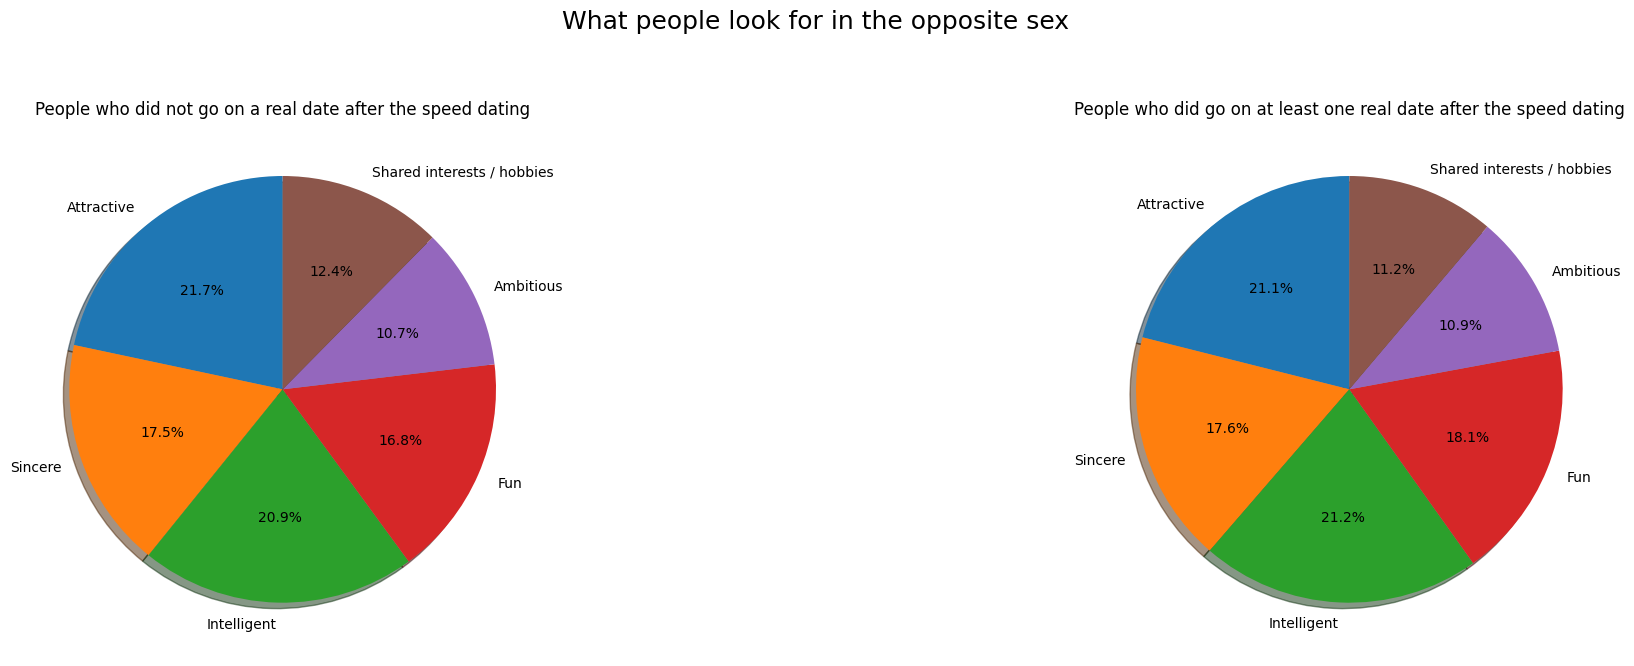

In [300]:
# Make several graphs in a single figure

# Creating data for Pie Charts

labels = ['Attractive','Sincere','Intelligent', 'Fun', 'Ambitious', 'Shared interests / hobbies']
data_no = [df_temp_date_no['attr1_1'], df_temp_date_no['sinc1_1'], df_temp_date_no['intel1_1'], df_temp_date_no['fun1_1'], df_temp_date_no['amb1_1'], df_temp_date_no['shar1_1']]
data_yes = [df_temp_date_yes['attr1_1'], df_temp_date_yes['sinc1_1'], df_temp_date_yes['intel1_1'], df_temp_date_yes['fun1_1'], df_temp_date_yes['amb1_1'], df_temp_date_yes['shar1_1']]

# Creating 2 subplots

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('What people look for in the opposite sex', fontsize=18, ha='center')

ax1.pie(data_no,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set_title('People who did not go on a real date after the speed dating')

ax2.pie(data_yes,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.set_title('People who did go on at least one real date after the speed dating')

# Control overlapping of subplots and titles, and fig size

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.1,
                    wspace=1,
                    hspace=0.4)

plt.gcf().set_size_inches(20, 10)

plt.show()

Is seems that there is no significant difference of what people are looking for in the opposite sex, in having a real date or not.

Let's see if there is an influence of the partner order during the wave in the decision process.

In [301]:
# Creating the data

df_temp_order = df1.groupby(by = ['order']).agg(nb_tot=('pid', 'count'), dec=('dec', 'sum')) # finding number of people in each order and yes decisions in each order
df_temp_order['yes_percentage'] = df_temp_order['dec'] / df_temp_order['nb_tot'] # creating percentage to be comparable because the number of people 'nb_tot' is different in each order category


In [302]:
df_temp_order

,nb_tot,dec,yes_percentage
order,,,
1,513,255,0.497076
2,507,198,0.390533
3,512,217,0.423828
4,507,225,0.443787
5,510,214,0.419608
6,502,225,0.448207
7,477,201,0.421384
8,473,196,0.414376
9,470,208,0.442553


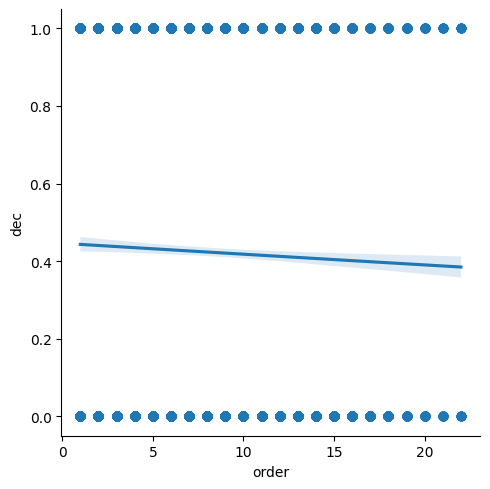

In [303]:
sns.lmplot(x="order", y="dec", data= df1, logistic = True)

We can see that decisions are slightly more positive at the beginning of waves. Maybe people are bored towards the end of the event.

Let's see what is the goal of people who get a date.

In [304]:
# Creating data to check the goal and real dates

df_temp_goal = df1.groupby(by = ['iid']).agg(goal=('goal', 'mean'), date=('date_3', 'mean')).groupby(by = ['goal']).agg(nb_date=('date', 'sum'), nb_people=('goal', 'count'))
# First I group by 'iid' (each person) to get individual goals and dates. Then I group by goal to have the number of people who got at least one date 'nb_date' and the total number of people in each goal 'nb_people'.

In [305]:
df_temp_goal['percentage'] = df_temp_goal['nb_date'] / df_temp_goal['nb_people']

In [306]:
df_temp_goal = df_temp_goal.sort_values('percentage', ascending = False)

In [307]:
df_temp_goal

,nb_date,nb_people,percentage
goal,,,
4.0,5.0,19,0.263158
5.0,7.0,35,0.200000
3.0,7.0,38,0.184211
1.0,39.0,226,0.172566
6.0,5.0,29,0.172414
2.0,30.0,182,0.164835


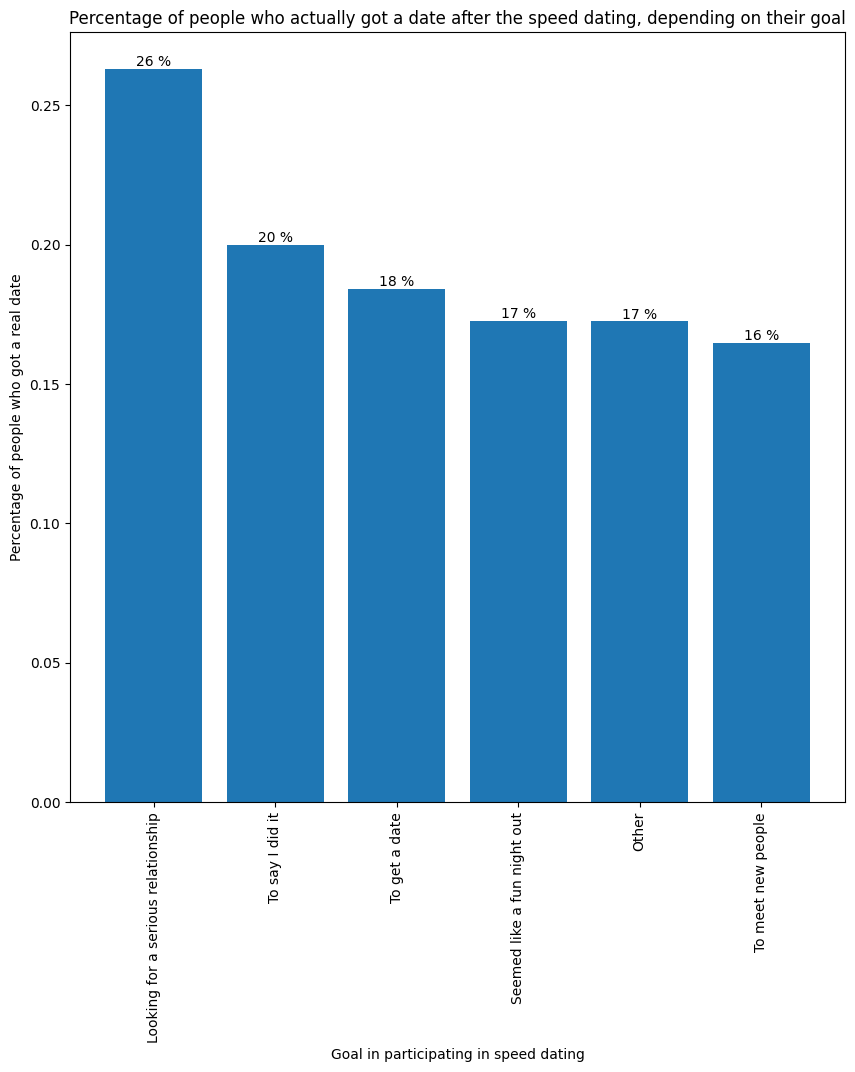

In [308]:
# Create the bar plot

names = ['Looking for a serious relationship', 'To say I did it', 'To get a date', 'Seemed like a fun night out', 'Other', 'To meet new people']

x_pos = range(len(names))

# Creation of the Barplot
plt.figure(figsize=(10,10)) # Enlarging the size of the figure
bar_graph = plt.bar(names, df_temp_goal['percentage'].to_list())
plt.xticks(x_pos, names, rotation=90) # rotating the text of the xlabel to remove overlapping
plt.title('Percentage of people who actually got a date after the speed dating, depending on their goal') # Title creation
plt.xlabel("Goal in participating in speed dating")  # Creation of label for the abscissa
plt.ylabel("Percentage of people who got a real date") # Creation of label for the ordinates

#Creating labels above the bars
for rect in bar_graph:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height*100:.0f} %', ha='center', va='bottom')

plt.show()

People are more likely to go on a real date when they are looking for a serious relationship.